# 4  Tabular Data and Basic Data Operations

### 4.1 Introduction

This document demonstrates the use of the pandas library in Python to do basic data wrangling and summarization.


### 4.2 Reading Tabular Data into Python

We’re going to be exploring pandas in the context of the famous Titanic dataset. We’ll work with a subset of this dataset, but more information about it all can be found here.

We start by loading the numpy and pandas libraries. Most of our data wrangling work will happen with functions from the pandas library, but the numpy library will be useful for performing certain mathematical operations should we choose to transform any of our data.



In [1]:
import numpy as np
import pandas as pd

In [2]:
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

Data files of many different types and shapes can be read into Python with similar functions, but we will focus on tabular data.



#### 4.2.1 Tidy Data is Special Tabular Data

For most people, the image that comes to mind when thinking about data is indeed something tabular or spreadsheet-like in nature. **Which is great!**

Tabular data is a form preferred by MANY different data operations and work. However, we will want to take this one step further. In almost all data science work we want our data to be **tidy**

A dataset is **tidy** if it adheres to following three characteristics:

* Every column is a variable

* Every row is an observation

* Every cell is a single value


You may have noticed that plotnine (ggplot) is basically built to take tidy data. Variables are specified in the aesthetics function to map them (i.e. columns) in our dataset to plot elements. This type of behavior is EXTREMELY common among functions that work with data in all languages, and so the importance of getting our data into a tidy format cannot be overstated.

In Python, there are at least two quick ways to view a dataset we’ve read in:




In [3]:
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


In [4]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


The latter `(.head())` is usually preferred in case the dataset is large.



#### 4.3 The “Big Five” Verbs of Data Wrangling


Data wrangling can involve a lot of different steps and operations to get data into a tidy format and ready for analysis and visualization. The vast majority of these fall under the umbrella one the following five operations:

1. **Select** columns/variables of interest

2. **Filter** rows/observations of interest

3. **Arrange** the rows of a dataset by column(s) of interest (i.e. order or sort)

4. **Mutate** the columns of a dataset (i.e. create or transform variables)

5. **Summarize** the rows of a dataset for column(s) of interest

#### 4.3.1 Select Columns/Variables



Suppose we want to select the age variable from the titanic DataFrame. There are three ways to do this.

1. Use `.loc`, specifying both the rows and columns. (The colon : is Python shorthand for “all”.)

`df_titanic.loc[:, "age"]`

2. Access the column as you would a key in a dict.

```
df_titanic["age"]
```

3. Access the column as an attribute of the DataFrame.

```
df_titanic.age
```

Method 3 (attribute access) is the most concise. However, it does not work if the variable name contains spaces or special characters, begins with a number, or matches an existing attribute of the `DataFrame`. So, methods 1 and 2 are usually safer and preferred.

To select multiple columns, you would pass in a list of variable names, instead of a single variable name. For example, to select both `age` and fare, either of the two methods below would work (and produce the same result):



```
# Method 1
df_titanic.loc[:, ["age", "fare"]].head()

# Method 2
df_titanic[["age", "fare"]].head()
```




### 4.3.2 Filter Rows/Observations

#### 4.3.2 Filter Rows/Observations

Before we see how to **filter** (i.e. **subset**) the rows of dataset based on some condition, let’s see how to select rows by explicitly identifying them.

We can select a row by its position using the **.iloc** attribute. Keeping in mind that the first row is actually row 0, the fourth row could be extracted as:



In [6]:
df_titanic.iloc[3]

,3
name,"Abbott, Mrs. Rhoda Mary 'Rosa'"
gender,female
age,39.0
class,3rd
embarked,S
country,England
ticketno,2673.0
fare,20.05
survived,1


Notice that a single row from a `DataFrame` is no longer a `DataFrame` but a different data structure, called a `Series`.

We can also select multiple rows by passing a list of positions to `.iloc`.

In [7]:
df_titanic.iloc[[1, 3]]

,name,gender,age,class,embarked,country,ticketno,fare,survived
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1


Notice that when we select multiple rows, we get a `DataFrame` back.

So a `Series` is used to store a single observation (across multiple variables), while a `DataFrame` is used to store multiple observations (across multiple variables).

If selecting consecutive rows, we can use Python’s `slice` notation. For example, the code below selects all rows from the fourth row, up to (but not including) the tenth row.

In [8]:
df_titanic.iloc[3:9]

,name,gender,age,class,embarked,country,ticketno,fare,survived
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,S,United States,348122.0,7.1300,1
6,"Abelson, Mr. Samuel",male,30.0,2nd,C,France,3381.0,24.0000,0
7,"Abelson, Mrs. Hannah",female,28.0,2nd,C,France,3381.0,24.0000,1
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,C,Lebanon,2699.0,18.1509,1


#### 4.3.2.2 Selecting Rows/Observations by Condition

We’ll often want to **filter** or **subset** the rows of a dataset based on some condition. To do this we’ll take advantage of **vectorization** and **boolean masking**.

Recall that we can compare the values of a variable/column to a particular value in the following way, and observe the result.

In [9]:
df_titanic["age"] > 30

,age
0,True
1,False
2,False
3,True
4,False
...,...
2202,True
2203,True
2204,True
2205,False


We can use these `True` and `False` values to filter/subset the dataset! The following subsets the titanic dataset down to only those individuals (rows) with ages over 30.

In [10]:
df_titanic[df_titanic["age"] > 30]


,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
12,"Ahlin, Mrs. Johanna Persdotter",female,40.0,3rd,S,Sweden,7546.0,9.0906,0
15,"Aldworth, Mr. Augustus Henry",male,35.0,2nd,S,England,248744.0,13.0000,0
21,"Allen, Mr. William Henry",male,39.0,3rd,S,England,373450.0,8.0100,0
...,...,...,...,...,...,...,...,...,...
2197,"Worthman, Mr. William Henry",male,37.0,engineering crew,S,England,NaN,NaN,0
2200,"Wright, Mr. William",male,40.0,victualling crew,S,England,NaN,NaN,1
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1


We can combine multiple conditions using `&`
(and) and `|` (or). The following subsets the titanic dataset down to females over 30 years of age.





In [11]:
df_titanic[(df_titanic["age"] > 30) & (df_titanic["gender"] == "female")]

,name,gender,age,class,embarked,country,ticketno,fare,survived
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
12,"Ahlin, Mrs. Johanna Persdotter",female,40.0,3rd,S,Sweden,7546.0,9.0906,0
35,"Andersson, Miss. Ida Augusta Margareta",female,38.0,3rd,S,Sweden,347091.0,7.1506,0
40,"Andersson, Mrs. Alfrida Konstantia Brogren",female,39.0,3rd,S,Sweden,347082.0,31.0506,0
44,"Andrews, Miss. Kornelia Theodosia",female,62.0,1st,C,United States,13502.0,77.1902,1
...,...,...,...,...,...,...,...,...,...
1997,"Robinson, Mrs. Annie",female,41.0,victualling crew,S,England,NaN,NaN,1
2059,"Smith, Miss. Katherine Elizabeth",female,45.0,victualling crew,S,England,NaN,NaN,1
2076,"Stap, Miss. Sarah Agnes",female,47.0,victualling crew,S,England,NaN,NaN,1
2143,"Wallis, Mrs. Catherine Jane",female,36.0,victualling crew,S,England,NaN,NaN,0


Check In

With the 2-3 people around you, how would you find the just the names of the males under 20 years of age who survived (in the titanic dataset) with a single line of code?


In [12]:

df_titanic[(df_titanic.age < 20) & (df_titanic.gender == 'male') & (df_titanic.survived == 1)]['name']

,name
13,"Aks, Master. Frank Philip"
22,"Allison, Master. Hudson Trevor"
58,"Asplund, Master. Edvin Rojj Felix"
62,"Asplund, Mr. Johan Charles"
104,"Becker, Master. Richard F."
183,"Caldwell, Master. Alden Gates"
206,"Carter, Master. William Thornton II"
244,"Cohen, Mr. Gurshon"
274,"Coutts, Master. Neville Leslie"
275,"Coutts, Master. William Loch"


#### 4.3.3 Arrange Rows

As part of exploratory data analysis and some reporting efforts, we will want to sort a dataset or set of results by one or more variables of interest.

We can do this with `.sort_values` in either ascending or descending order.

The following sorts the titanic dataset by `age` in decreasing order.

In [13]:
df_titanic.sort_values(by = ["age"], ascending=False)

,name,gender,age,class,embarked,country,ticketno,fare,survived
1176,"Svensson, Mr. Johan",male,74.000000,3rd,S,Sweden,347060.0,7.1506,0
820,"Mitchell, Mr. Henry Michael",male,72.000000,2nd,S,England,24580.0,10.1000,0
53,"Artagaveytia, Mr. Ramon",male,71.000000,1st,C,Argentina,17609.0,49.1001,0
456,"Goldschmidt, Mr. George B.",male,71.000000,1st,C,United States,17754.0,34.1301,0
282,"Crosby, Captain. Edward Gifford",male,70.000000,1st,S,United States,5735.0,71.0000,0
...,...,...,...,...,...,...,...,...,...
1182,"Tannūs, Master. As'ad",male,0.416667,3rd,C,Lebanon,2625.0,8.1004,1
296,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.333333,3rd,S,Sweden,347080.0,14.0800,0
316,"Dean, Miss. Elizabeth Gladys 'Millvina'",female,0.166667,3rd,S,England,2315.0,20.1106,1
439,"Gheorgheff, Mr. Stanio",male,NaN,3rd,C,Bulgaria,349254.0,7.1711,0


Notice that in these last few sections, we have not made any permanent changes to the `df_titanic` object. We have only asked python do some selecting/filtering/sorting and then to print out the results, not save them.

If we wanted `df_titanic` to become permanently sorted by age, we would re-assign the object:

In [ ]:
df_titanic = df_titanic.sort_values(by = ["age"], ascending=False)

You will sometimes see object reassignment happen in a different way, using an inplace = True argument, like this:



In [ ]:
df_titanic.sort_values(by = ["age"], ascending=False, inplace=True)

We strongly recommend **against** this approach, for two reason:

1. When an object is “overwritten” via reassignment, that’s a major decision; you lose the old version of the object. It should be made deliberately and obviously. The `inplace` argument is easy to miss when copying/editing code, so it can lead to accidental overwriting that is hard to keep track of.

2. Not all functions of DataFrames have an `inplace` option. It can be frustrating to get into the habit of using it, only to find out the hard way that it’s not available half the time!

#### 4.3.4 Mutate Column(s)

The variables available to us in our original dataset contain all of the information we have access to, but the best insights may instead come from transformations of those variables.

#### 4.3.4.1 Transforming Quantitative Variables
One of the simplest reasons to want to transform a quantitative variable is to change the measurement units.

Here we change the `age` of passengers from a value in years to a value in decades.



In [14]:
df_titanic["age"] = df_titanic["age"] / 10

If we have a quantitative variable that is particularly skewed, then it might be a good idea to transform the values of that variable…like taking the log of the values.



Below is an example of taking the `log` of the `fare` variable. Notice that we’re making use of the `numpy` here to take the `log`.

In [15]:
df_titanic["fare"] = np.log(df_titanic["fare"])

Remember that we can take advantage of **vectorization** here too. The following operation wouldn’t really make physical sense, but it’s an example of **creating a new variable** out of existing variables.



In [ ]:
df_titanic["nonsense"] = df_titanic["fare"] / df_titanic["age"]

Note that we created the new variable, `nonsense`, by specifying on the left side of the `=` here and populating that column/variable via the expression on the right side of the `=`.

We could want to create a new variable by categorizing (or discretizing) the values of a quantitative variable (i.e. convert a quantitative variable to a categorical variable). We can do so with `cut`.

In the following, we create a new `age_cat` variable which represents whether a person is a child or an adult.

In [16]:
df_titanic["age_cat"] = pd.cut(df_titanic["age"],
                              bins = [0, 18, 100],
                              labels = ["child", "adult"])

Check In

Consider the four mutations we just performed. In which ones did we reassign a column of the dataset, thus replacing the old values with new ones? In which ones did we create a brand-new column, thus retaining the old column(s) that were involved in the calculation?



**Reassigning Columns (Replacing old values):**


1. **`df_titanic["age"] = df_titanic["age"] / 10`:** This line takes the existing "age" column and divides all its values by 10. The original "age" column is replaced with these new values.


2. **`df_titanic["fare"] = np.log(df_titanic["fare"])`:** Similarly, this line calculates the natural logarithm of the "fare" column and replaces the original "fare" values with the log-transformed values.



**Creating New Columns (Retaining old columns):**


1. **`df_titanic["nonsense"] = df_titanic["fare"] / df_titanic["age"]`:** This line creates a brand-new column called "nonsense". It calculates the result of dividing the "fare" by the "age" for each row and stores it in this new column. The original "fare" and "age" columns remain unchanged.


2. **`df_titanic["age_cat"] = pd.cut(...)`:** This line creates a new column called "age_cat" based on the categorization of the "age" column using `pd.cut`. It creates new categories (child, adult) based on the age ranges and assigns those categories to the new column. The original "age" column still exists alongside this new categorization column.


**In Summary:**

* **Reassignment:**
    * `df_titanic["age"] = df_titanic["age"] / 10`
    * `df_titanic["fare"] = np.log(df_titanic["fare"])`

* **New Column Creation:**
    * `df_titanic["nonsense"] = df_titanic["fare"] / df_titanic["age"]`
    * `df_titanic["age_cat"] = pd.cut(...)`

#### 4.3.4.2 Transforming Categorical Variables

In some situations, especially later with modeling, we’ll need to convert categorical variables (stored as text) into quantitative (often coded) variables. Binary categorical variables can be converted into quantitative variables by coding one category as 1 and the other category as 0. (In fact, the **survived** column in the titanic dataset has already been coded this way.) The easiest way to do this is to create a boolean mask. For example, to convert `gender` to a quantitative variable `female`, which is 1 if the passenger was female and 0 otherwise, we can do the following:



In [17]:
df_titanic["female"] = 1 * (df_titanic["gender"] == "female")

What do we do about a categorical variable with more than twwo categories, like embarked, which has four categories? In general, a categorical variable with K categories can be converted into K separate 0/1 variables, or dummy variables. Each of the K dummy variables is an indicator for one of the K categories. That is, a dummy variable is 1 if the observation fell into its particular category and 0 otherwise.



Although it is not difficult to create dummy variables manually, the easiest way to create them is the `get_dummies()` function in `pandas`.



In [18]:
pd.get_dummies(df_titanic["embarked"])

,B,C,Q,S
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
2202,True,False,False,False
2203,False,False,False,True
2204,False,False,False,True
2205,False,False,False,True


We may also want to change the levels of a categorical variable. A categorical variable can be transformed by mapping its levels to new levels. For example, we may only be interested in whether a person on the titanic was a passenger or a crew member. The variable `class` is too detailed. We can create a new variable, `type`, that is derived from the existing variable `class`. Observations with a `class` of “1st”, “2nd”, or “3rd” get a value of “passenger”, while observations with a `class` of “victualling crew”, “engineering crew”, or “deck crew” get a value of “crew”.



In [19]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,age_cat,female,type
0,"Abbing, Mr. Anthony",male,4.2,3rd,S,United States,5547.0,1.961502,0,child,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,1.3,3rd,S,United States,2673.0,2.998229,0,child,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,1.6,3rd,S,United States,2673.0,2.998229,0,child,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,3.9,3rd,S,England,2673.0,2.998229,1,child,1,passenger
4,"Abelseth, Miss. Karen Marie",female,1.6,3rd,S,Norway,348125.0,1.964311,1,child,1,passenger
...,...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,4.1,deck crew,B,England,NaN,NaN,1,child,0,crew
2203,"Yearsley, Mr. Harry",male,4.0,victualling crew,S,England,NaN,NaN,1,child,0,crew
2204,"Young, Mr. Francis James",male,3.2,engineering crew,S,England,NaN,NaN,0,child,0,crew
2205,"Zanetti, Sig. Minio",male,2.0,restaurant staff,S,England,NaN,NaN,0,child,0,NaN


#### 4.3.5 Summarizing Rows

Summarization of the rows of a dataset for column(s) of interest can take many different forms. This introduction will not be exhaustive, but certainly cover the basics.

#### 4.3.5.1 Summarizing a Quantitative Variable
There are a few descriptive statistics that can be computed directly including, but not limited to, the mean and median.



In [20]:
df_titanic["age"].mean()

df_titanic["age"].median()

df_titanic[["age", "fare"]].mean()

,0
age,3.043673
fare,2.918311


We can ask for a slightly more comprehensive description using `.describe()`



In [22]:
df_titanic["age"].describe()

df_titanic.describe()

,age,ticketno,fare,survived,female
count,2205.000000,1.316000e+03,1291.000000,2207.000000,2207.000000
mean,3.043673,2.842157e+05,2.918311,0.322157,0.221568
std,1.215968,6.334726e+05,0.974452,0.467409,0.415396
min,0.016667,2.000000e+00,1.108728,0.000000,0.000000
25%,2.200000,1.426225e+04,1.971383,0.000000,0.000000
50%,2.900000,1.114265e+05,2.645480,0.000000,0.000000
75%,3.800000,3.470770e+05,3.435945,1.000000,0.000000
max,7.400000,3.101317e+06,6.238443,1.000000,1.000000


Note that, by default, `.describe()` provides descriptive statistics for only the quantitative variables in the dataset.

We can enhance numerical summaries with `.groupby()`, which allows us to specify one or more variables that we’d like to **group** our work by.

In [23]:
df_titanic[["age", "survived"]].groupby("survived").mean()

,age
survived,
0,3.083194
1,2.960631


Check In

With 2-3 people around you, look up how you would compute the correlation between two quantitative variables in Python. Compute the correlation between the age and fare variables in the titanic dataset.



In [24]:

correlation = df_titanic['age'].corr(df_titanic['fare'])
print(f"Correlation between age and fare: {correlation}")

Correlation between age and fare: 0.21856121130165354


###***Steps for Code***



1. **Load the Titanic Dataset into a DataFrame**:

First, I would ensure the Titanic dataset is loaded into a Pandas DataFrame, typically by using a CSV file or a dataset available through a library like Seaborn. Assuming it is already loaded into df_titanic.

```
df_titanic = pd.read_csv('titanic.csv')
```

2. **Use the .corr() Method to Compute Correlation:**

I use the `.corr()` method from Pandas to compute the Pearson correlation coefficient between the age and fare variables. This coefficient ranges between -1 and 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate little to no linear relationship.


```
correlation = df_titanic['age'].corr(df_titanic['fare'])
```

3. **Print the Correlation Value with print():**
I use the print() function to display the correlation coefficient in a readable format. The f-string formatting ensures the correlation value is included directly within the output message.



`print(f"Correlation between age and fare: {correlation}")`





#### 4.3.5.2 Summarizing a Categorical Variable

When it comes to categorical variables we’re most often interested in **frequency distributions** (counts), **relative frequency distributions**, and **cross-tabulations**.



In [25]:
df_titanic["class"].unique()

df_titanic["class"].describe()

,class
count,2207
unique,7
top,3rd
freq,709


The `.unique()` here allows us to see the unique values of the `class` variable. Notice that the results of `.describe()` on a categorical variable are much different.

To completely summarize a single categorical variable, we report the number of times each level appeared, or its **frequency**.

In [26]:
df_titanic["class"].value_counts()

,count
class,
3rd,709
victualling crew,431
1st,324
engineering crew,324
2nd,284
restaurant staff,69
deck crew,66


Instead of reporting counts, we can also report proportions or probabilities, or the relative frequencies. We can calculate the relative frequencies by specifying `normalize=True` in .`value_counts()`.



In [27]:
df_titanic["class"].value_counts(normalize=True)

,proportion
class,
3rd,0.321251
victualling crew,0.195288
1st,0.146806
engineering crew,0.146806
2nd,0.128681
restaurant staff,0.031264
deck crew,0.029905


Cross-tabulations are one way we can investigate possible relationships between categorical variables. For example, what can we say about the relationship between `gender` and `survival` on the Titanic?



Check In

Summarize `gender` and `survival` individually by computing the frequency distributions of each.



In [28]:

gender_counts = df_titanic["gender"].value_counts()
print("Gender Frequency Distribution:")
print(gender_counts)

survival_counts = df_titanic["survived"].value_counts()
print("\nSurvival Frequency Distribution:")
survival_counts

Gender Frequency Distribution:
gender
male      1718
female     489
Name: count, dtype: int64

Survival Frequency Distribution:


,count
survived,
0,1496
1,711


This does not tell us how gender interacts with survival. To do that, we need to produce a cross-tabulation, or a “cross-tab” for short. (Statisticians tend to call this a contingency table or a two-way table.)



In [29]:
pd.crosstab(df_titanic["survived"], df_titanic["gender"])

gender,female,male
survived,,
0,130,1366
1,359,352


A cross-tabulation of two categorical variables is a two-dimensional array, with the levels of one variable along the rows and the levels of the other variable along the columns. Each cell in this array contains the number of observations that had a particular combination of levels. So in the Titanic data set, there were 359 females who survived and 1366 males who died. From the cross-tabulation, we can see that there were more females who survived than not, while there were more males who died than not. Clearly, gender had a strong influence on survival because of the Titanic’s policy of “women and children first”.

To get probabilities instead of counts, we specify `normalize=True`

In [30]:
pd.crosstab(df_titanic["survived"], df_titanic["gender"], normalize=True)

gender,female,male
survived,,
0,0.058903,0.618940
1,0.162664,0.159493


Check In

What about conditional proportions? With 2-3 people around you, discuss how you would compute the proportion of females that survived and the proportion of males that survived and then do it.

Note, there are multiple ways to do this.

In [31]:

female_survived_count = df_titanic[(df_titanic["gender"] == "female") & (df_titanic["survived"] == 1)].shape[0]
female_total_count = df_titanic[df_titanic["gender"] == "female"].shape[0]
female_survival_proportion = female_survived_count / female_total_count

male_survived_count = df_titanic[(df_titanic["gender"] == "male") & (df_titanic["survived"] == 1)].shape[0]
male_total_count = df_titanic[df_titanic["gender"] == "male"].shape[0]
male_survival_proportion = male_survived_count / male_total_count

print(f"Proportion of females that survived: {female_survival_proportion}")
print(f"Proportion of males that survived: {male_survival_proportion}")

Proportion of females that survived: 0.7341513292433538
Proportion of males that survived: 0.2048894062863795


####**Steps for Code**



1. **Filter the Data to Count Surviving Females**  
   First, I use boolean masking to filter the DataFrame for rows where the passenger is female and survived. I count the number of such rows using `.shape[0]` to get the total count of females who survived.

   ```python
   female_survived_count = df_titanic[(df_titanic["gender"] == "female") & (df_titanic["survived"] == 1)].shape[0]
   ```

---

2. **Filter the Data to Count Total Females**  
   I use boolean masking again to filter the DataFrame for all female passengers, regardless of survival. Using `.shape[0]`, I get the total count of females on the Titanic.

   ```python
   female_total_count = df_titanic[df_titanic["gender"] == "female"].shape[0]
   ```

---

3. **Compute the Proportion of Surviving Females**  
   I compute the proportion of females who survived by dividing the count of surviving females by the total number of females.

   ```python
   female_survival_proportion = female_survived_count / female_total_count
   ```

---

4. **Filter the Data to Count Surviving Males**  
   Similarly, I filter the DataFrame for rows where the passenger is male and survived. I use `.shape[0]` to get the count of surviving males.

   ```python
   male_survived_count = df_titanic[(df_titanic["gender"] == "male") & (df_titanic["survived"] == 1)].shape[0]
   ```

---

5. **Filter the Data to Count Total Males**  
   I filter the DataFrame for all male passengers, regardless of survival. I use `.shape[0]` to get the total count of males on the Titanic.

   ```python
   male_total_count = df_titanic[df_titanic["gender"] == "male"].shape[0]
   ```

---

6. **Compute the Proportion of Surviving Males**  
   I compute the proportion of males who survived by dividing the count of surviving males by the total number of males.

   ```python
   male_survival_proportion = male_survived_count / male_total_count
   ```

---

7. **Print the Proportions with `print()`**  
   I use the `print()` function to display the survival proportions for both females and males in a readable format.

   ```python
   print(f"Proportion of females that survived: {female_survival_proportion}")
   print(f"Proportion of males that survived: {male_survival_proportion}")
   ```





---



## Practice Activity 2.1 : Data Wrangling

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [32]:
# Import the titanic dataset here

import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [33]:
# Code here

df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic_passenger = df_titanic[(df_titanic["type"] == 'passenger')]
df_titanic_passenger.head()

joint_dist = pd.crosstab(df_titanic_passenger['class'], df_titanic_passenger['embarked'])

joint_dist.head()

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


### **Steps for Code**

---

1. **Map Passenger Classes to Types**  
   In this step, a new column called `"type"` is created. It maps the `"class"` column in the Titanic dataset to either `"passenger"` or `"crew"`. Specifically, the first, second, and third classes are mapped to `"passenger"`, while various crew roles are mapped to `"crew"`.

   ```python
   df_titanic["type"] = df_titanic["class"].map({
       "1st": "passenger",
       "2nd": "passenger",
       "3rd": "passenger",
       "victualling crew": "crew",
       "engineering crew": "crew",
       "deck crew": "crew"
   })
   ```

---

2. **Filter the Data to Include Passengers Only**  
   A new DataFrame called `df_titanic_passenger` is created by filtering the original DataFrame to only include rows where the `"type"` column is `"passenger"`. This ensures that the analysis focuses solely on passengers.

   ```python
   df_titanic_passenger = df_titanic[df_titanic["type"] == "passenger"]
   df_titanic_passenger.head()  # Display the first few rows to confirm filtering
   ```

---

3. **Calculate the Joint Distribution with `pd.crosstab()`**  
   The `pd.crosstab()` function is used to calculate the joint distribution (or contingency table) between the passenger’s class (`'class'`) and their embarkation point (`'embarked'`). This creates a table where each entry shows the count of passengers for a given class and embarkation point combination.

   ```python
   joint_dist = pd.crosstab(df_titanic_passenger['class'], df_titanic_passenger['embarked'])
   ```

---

4. **Display the Joint Distribution**  
   The `head()` function is used to display the first few rows of the joint distribution table, ensuring the data is formatted correctly.

   ```python
   joint_dist.head()
   ```



## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [34]:
# Conditional distribution of class given where they embarked
class_given_embarked = pd.crosstab(df_titanic_passenger['class'], df_titanic_passenger['embarked'], normalize='columns')
class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [35]:
# Conditional distribution of embarked location given their class
embarked_given_class = pd.crosstab(df_titanic_passenger['class'], df_titanic_passenger['embarked'], normalize='index')
embarked_given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [36]:
# Proportion of 3rd class passengers embarked at Southampton
proportion_3rd_class_southampton = embarked_given_class.loc['3rd', 'S']
proportion_3rd_class_southampton

0.6967559943582511

In [37]:
# Proportion of Southampton passengers were in 3rd class?
proportion_southampton_3rd_class = class_given_embarked.loc['3rd', 'S']
proportion_southampton_3rd_class

0.5404814004376368

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

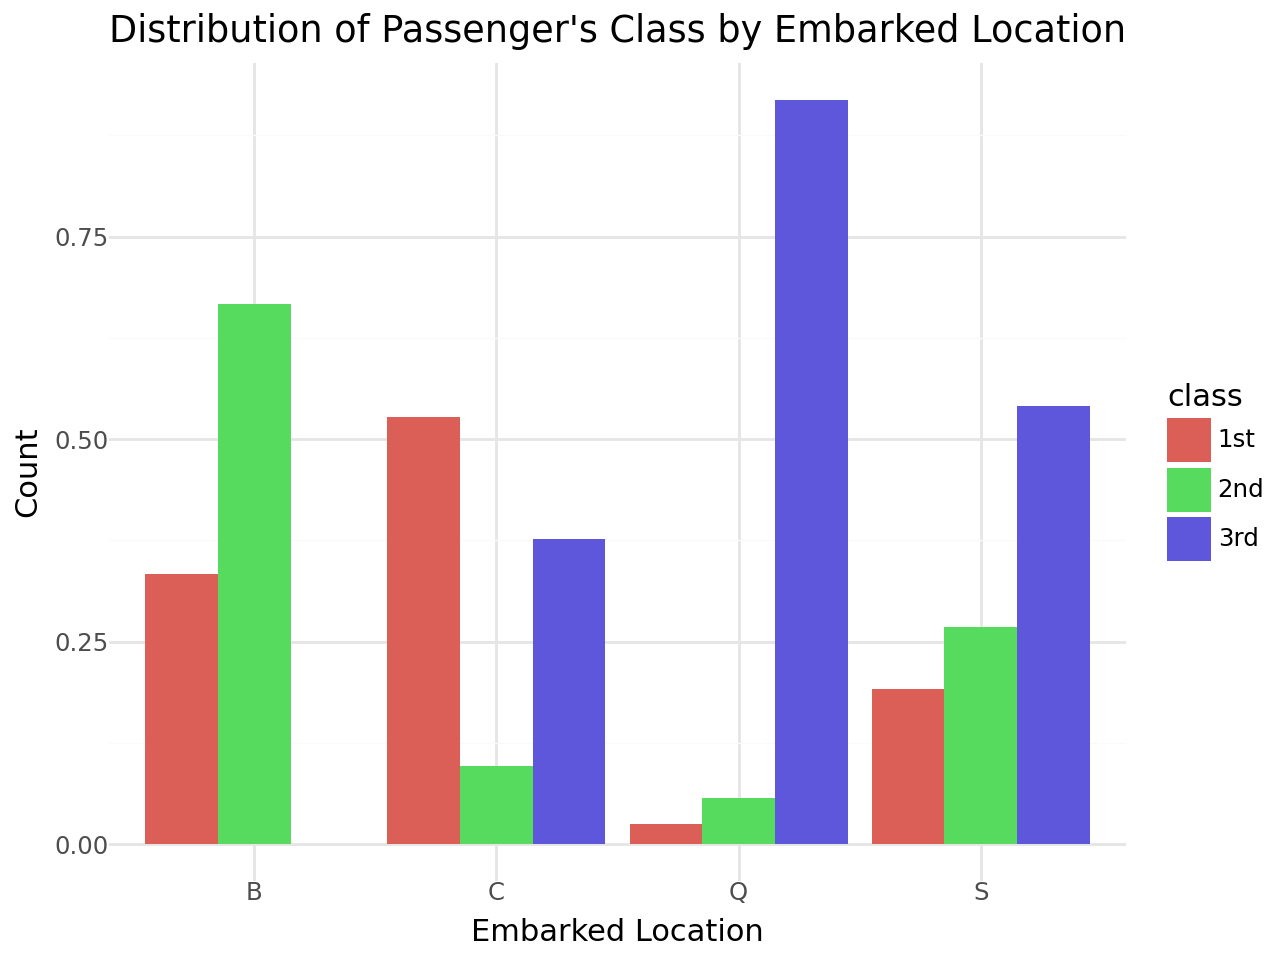

In [40]:
from plotnine import ggplot, aes, geom_bar, labs, theme, position_stack, stat_identity, theme_minimal, position_dodge


df_plot = class_given_embarked.reset_index().melt(id_vars='class', var_name='embarked', value_name='count')


# Create the plot with dodged bars
plot_dodge = (ggplot(df_plot, aes(x='embarked', y='count', fill='class'))
              + geom_bar(stat='identity', position=position_dodge())  # Bars side by side
              + labs(title="Distribution of Passenger's Class by Embarked Location",
                     x="Embarked Location",
                     y="Count")
              + theme_minimal()
             )

plot_dodge

The dodged bar plot effectively visualizes the distribution of passenger classes across different embarkation points, making it easy to compare proportions side by side. It's useful for quickly spotting patterns, such as which embarkation point has more passengers in a particular class. However, the plot sacrifices precision, as it's harder to read exact proportions compared to the conditional distributions I calculated earlier. For answering specific, detailed questions like "What proportion of 3rd class passengers embarked at Southampton?" the conditional distribution table provides more accurate data. In summary, the plot is visually engaging and good for pattern recognition, while the calculations offer exact, numerical insights.

### **Steps for Code**

---

1. **Import Required Libraries from `plotnine`**  
   I import the necessary components from the `plotnine` library, including `ggplot` for creating the plot, `aes` for defining aesthetic mappings, `geom_bar` for generating bar plots, and other functions for customizing the layout and appearance.

   ```python
   from plotnine import ggplot, aes, geom_bar, labs, theme, position_dodge, theme_minimal
   ```

---

2. **Prepare the Data with `melt()`**  
   I use the `.reset_index()` method to flatten the `class_given_embarked` DataFrame, followed by the `.melt()` function to reshape the DataFrame into a format suitable for plotting. The `class` column is treated as the identifier, and the `embarked` values are transformed into a long format with their counts.

   ```python
   df_plot = class_given_embarked.reset_index().melt(
       id_vars='class', var_name='embarked', value_name='count'
   )
   ```

---

3. **Create a Bar Plot with Dodged Bars**  
   I use `ggplot()` to initialize the plot and map aesthetics (`aes`) such as `embarked` to the x-axis, `count` to the y-axis, and `class` to the fill color. I use `geom_bar()` with `stat='identity'` to plot the actual counts, and `position=position_dodge()` to create side-by-side bars for each class.

   ```python
   plot_dodge = (
       ggplot(df_plot, aes(x='embarked', y='count', fill='class'))
       + geom_bar(stat='identity', position=position_dodge())  # Bars side by side
   )
   ```

---

4. **Add Labels and Apply Minimal Theme**  
   I use `labs()` to add meaningful titles and axis labels. The x-axis is labeled "Embarked Location", the y-axis is labeled "Count", and the title explains that the plot shows the distribution of passenger classes by embarked location. The `theme_minimal()` function is used to apply a clean and minimalistic theme to the plot.

   ```python
   + labs(
       title="Distribution of Passenger's Class by Embarked Location",
       x="Embarked Location",
       y="Count"
   )
   + theme_minimal()
   ```







---



### 5  Pivoting and Joining

#### 5.1 Introduction

This document demonstrates the use of the pandas library in Python to do pivoting and joining of datasets.



In [51]:
pip install pandas

In [52]:
import pandas as pd

In [58]:


from google.colab import files
uploaded = files.upload()


Saving pop.csv to pop.csv


In [60]:
# Population data from GapMinder
population = pd.read_csv("pop.csv")

#### 5.2 Pivoting Data in Python

Data come in all shapes and forms! Rare is the day when we can open a dataset for the first time and it’s ready for every type of visualization or analysis that we could want to do with it.

In addition to the wrangling we discussed in the previous chapter, there may be a need to reshape the dataset entirely. For example, the column names might be values themselves that we want to make use of.

Recall our introduction of tidy data in the previous chapter…

#### 5.2.1 Tidy Data is Special Tabular Data


For most people, the image that comes to mind when thinking about data is indeed something tabular or spreadsheet-like in nature. Which is great!

Tabular data is a form preferred by MANY different data operations and work. However, we will want to take this one step further. In almost all data science work we want our data to be tidy

A dataset is tidy if it adheres to following three characteristics:

* Every column is a variable

* Every row is an observation

* Every cell is a single value

In the previous chapter you were asked to open up a GapMinder dataset here and to comment on whether this dataset was tidy or not. The answer was no, this dataset is not tidy. These datasets come with a row representing a country, each column representing a year, and each cell representing the value of the global indicator selected. To be tidy these three variables (country, year, global indicator) should each have their own column, instead of the year variable taking values as the column headers.


#### 5.2.2 Wide to Long Format

The GapMinder dataset is an example of what’s commonly referred to as data in a wide format. To make this dataset tidy we aim for a dataset with columns for country, year, and global indicator (e.g. population). Three columns is many fewer than the current number of columns, and so we will convert this dataset from wide to long format.

It often helps to physically draw/map out what our current dataset looks like and what the look of our target dataset is, before actually trying to write any code to do this. Writing the code can be **extremely** easier after this exercise, and only makes future pivot operations easier.

In order to convert our dataset from *wide to long* format we will use .melt() (or .wide_to_long()) in pandas.




In [61]:
long_population = population.melt(id_vars=["country"], var_name="year", value_name="population")

#### 5.2.3 Long to Wide Format
Even though certain data shapes are not considered tidy, they may be more conducive to performing certain operations than other shapes. For example, what if we were interested in the change in country population between 1950 and 2010? In the original wide shape of the GapMinder data this operation would have been a simple difference of columns like below.



In [63]:
population["pop_diff"] = population["2010"] - population["1950"]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In the long format of our Gapminder dataset (long_population), this operation is less straightforward. Sometimes datasets come to us in long format and to do things like the operation above we need to convert that dataset from long to wide format. We can go the reverse direction (i.e. long to wide format) with .pivot() in pandas.




In [66]:
wide_population = long_population.pivot(index = "country", columns = "year", values = "population")
wide_population = wide_population.reset_index()

We haven’t spent much time discussing the index of a pandas DataFrame, but you can think of it like an address for data, or slices of data in a DataFrame. You can also think of an index (or indices) as row names, or axis labels, for your dataset. This can be useful for a number of functions in Python, and can enhance the look of results or visualizations.

However, understanding them is not critical for what we will do in Python. Furthermore, variables that are indices for a DataFrame cannot be accessed or referenced in the same way as other variables in the DataFrame. So, we will avoid their use if possible.

#### 5.3 Joining Datasets in Python
The information you need is often spread across multiple data sets, so you will need to combine multiple data sets into one. In this chapter, we discuss strategies for combining information from multiple (tabular) data sets.

As a working example, we will use a data set of baby names collected by the Social Security Administration. Each data set in this collection contains the names of all babies born in the United States in a particular year. This data is publicly available, and a copy has been made available at https://dlsun.github.io/pods/data/names/.



### 5.3.1 Concatenating and Merging Data
#### 5.3.1.1 Concatenation

Sometimes, the rows of data are spread across multiple files, and we want to combine the rows into a single data set. The process of combining rows from different data sets is known as concatenation.

Visually, to concatenate two DataFrames, we simply stack them on top of one another.

For example, suppose we want to understand how the popularity of different names evolved between 1995 and 2015. The 1995 names and the 2015 names are stored in two different files: yob1995.txt and yob2015.txt, respectively. To carry out this analysis, we will need to combine these two data sets into one.



In [67]:
data_dir = "http://dlsun.github.io/pods/data/names/"
names1995 = pd.read_csv(data_dir + "yob1995.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
names1995

,Name,Sex,Count
0,Jessica,F,27935
1,Ashley,F,26603
2,Emily,F,24378
3,Samantha,F,21646
4,Sarah,F,21369
...,...,...,...
26075,Zerek,M,5
26076,Zhen,M,5
26077,Ziggy,M,5
26078,Zuberi,M,5


In [68]:
names2015 = pd.read_csv(data_dir + "yob2015.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
names2015

,Name,Sex,Count
0,Emma,F,20455
1,Olivia,F,19691
2,Sophia,F,17417
3,Ava,F,16378
4,Isabella,F,15617
...,...,...,...
33116,Zykell,M,5
33117,Zyking,M,5
33118,Zykir,M,5
33119,Zyrus,M,5


To concatenate the two, we use the `pd.concat() `function, which accepts a list of `pandas` objects (`DataFrames or Series`) and concatenates them.



In [70]:
pd.concat([names1995, names2015])


,Name,Sex,Count
0,Jessica,F,27935
1,Ashley,F,26603
2,Emily,F,24378
3,Samantha,F,21646
4,Sarah,F,21369
...,...,...,...
33116,Zykell,M,5
33117,Zyking,M,5
33118,Zykir,M,5
33119,Zyrus,M,5


1. There is no longer any way to distinguish the 1995 data from the 2015 data. To fix this, we can add a Year column to each DataFrame before we concatenate.

2. The indexes from the original DataFrames are preserved in the concatenated DataFrame. (To see this, observe that the last index in the DataFrame is about 33000, which corresponds to the number of rows in names2015, even though there are 59000 rows in the DataFrame.) That means that there are two rows with an index of 0, two rows with an index of 1, and so on. To force pandas to generate a completely new index for this DataFrame, ignoring the indices from the original DataFrames, we specify ignore_index=True.

In [71]:
names1995["Year"] = 1995
names2015["Year"] = 2015
names = pd.concat([names1995, names2015], ignore_index=True)
names

,Name,Sex,Count,Year
0,Jessica,F,27935,1995
1,Ashley,F,26603,1995
2,Emily,F,24378,1995
3,Samantha,F,21646,1995
4,Sarah,F,21369,1995
...,...,...,...,...
59196,Zykell,M,5,2015
59197,Zyking,M,5,2015
59198,Zykir,M,5,2015
59199,Zyrus,M,5,2015


Now this is a DataFrame we can use!



### 5.3.1.2 Merging (a.k.a Joining)

More commonly, the data sets that we want to combine actually contain different information about the same observations. In other words, instead of stacking the DataFrames on top of each other, as in concatenation, we want to stack them next to each other. The process of combining columns or variables from different data sets is known as merging or joining.

The observations may be in a different order in the two data sets, so merging is not as simple as placing the two DataFrames side-by-side.

Merging is an operation on two DataFrames that returns a third DataFrame. By convention, the first DataFrame is referred to as the one on the “left”, while the second DataFrame is the one on the “right”.

This naming convention is reflected in the syntax of the .merge() function in pandas. In the code below, the “left” DataFrame, names1995, is quite literally on the left in the code, while the “right” DataFrame, names2015, is to the right. We also specify the variables to match across the two DataFrames.



In [72]:
names1995.merge(names2015, on=["Name", "Sex"])

,Name,Sex,Count_x,Year_x,Count_y,Year_y
0,Jessica,F,27935,1995,1587,2015
1,Ashley,F,26603,1995,3424,2015
2,Emily,F,24378,1995,11786,2015
3,Samantha,F,21646,1995,5340,2015
4,Sarah,F,21369,1995,4521,2015
...,...,...,...,...,...,...
15675,Zephan,M,5,1995,23,2015
15676,Zeppelin,M,5,1995,70,2015
15677,Zerek,M,5,1995,5,2015
15678,Ziggy,M,5,1995,44,2015


The most important component of merging two datasets is the presence of at least one key variable that both datasets share. This variable is sometimes referred to as an ID variable. It’s this variable that we will want to merge on, i.e. use to combine the two datasets intelligently.

The variables that we joined on (Name and Sex) appear once in the final DataFrame. The variable Count, which we did not join on, appears twice—since there was a column called Count in both of the original DataFrames. Notice that pandas automatically appended the suffix _x to the name of the variable from the left DataFrame and _y to the one from the right DataFrame. We can customize the suffixes by specifying the suffixes= parameter.

In [73]:
names1995.merge(names2015, on=["Name", "Sex"], suffixes=("1995", "2015"))

,Name,Sex,Count1995,Year1995,Count2015,Year2015
0,Jessica,F,27935,1995,1587,2015
1,Ashley,F,26603,1995,3424,2015
2,Emily,F,24378,1995,11786,2015
3,Samantha,F,21646,1995,5340,2015
4,Sarah,F,21369,1995,4521,2015
...,...,...,...,...,...,...
15675,Zephan,M,5,1995,23,2015
15676,Zeppelin,M,5,1995,70,2015
15677,Zerek,M,5,1995,5,2015
15678,Ziggy,M,5,1995,44,2015


In the code above, we assumed that the columns that we joined on had the same names in the two data sets. What if they had different names? For example, suppose the variable had been called Sex in one data set and Gender in the other. We can specify which variables to use from the left and right data sets using the left_on= and right_on= parameters.



In [74]:
# Create new DataFrames where the column names are different
names2015_ = names2015.rename({"Sex": "Gender"}, axis=1)

# This is how you merge them.
names1995.merge(
    names2015_,
    left_on=("Name", "Sex"),
    right_on=("Name", "Gender")
)

,Name,Sex,Count_x,Year_x,Gender,Count_y,Year_y
0,Jessica,F,27935,1995,F,1587,2015
1,Ashley,F,26603,1995,F,3424,2015
2,Emily,F,24378,1995,F,11786,2015
3,Samantha,F,21646,1995,F,5340,2015
4,Sarah,F,21369,1995,F,4521,2015
...,...,...,...,...,...,...,...
15675,Zephan,M,5,1995,M,23,2015
15676,Zeppelin,M,5,1995,M,70,2015
15677,Zerek,M,5,1995,M,5,2015
15678,Ziggy,M,5,1995,M,44,2015


### 5.3.1.3 One-to-One and Many-to-One Relationships

In the example above, there was at most one combination of Name and Sex in the 2015 data set for each combination of Name and Sex in the 1995 data set. These two data sets are thus said to have a one-to-one relationship. The same would be true of combining two GapMinder datasets.

However, two data sets need not have a one-to-one relationship! Two datasets could have a many-to-one relationship. In general, it’s extremely important to think carefully about what variables each of your two datasets have to begin with, and what variables you want your merged dataset to have…and what that merged dataset will represent with respect to your data.


### 5.3.1.4 Many-to-Many Relationships: A Cautionary Tale

It is also possible for multiple rows in the left DataFrame to match multiple rows in the right DataFrame. In this case, the two data sets are said to have a many-to-many relationship. Many-to-many joins can lead to misleading analyses, so it is important to exercise caution when working with many-to-many relationships.

For example, in the baby names data set, the Name variable is not uniquely identifying. For example, there are both males and females with the name “Jessie”.



In [75]:
jessie1995 = names1995[names1995["Name"] == "Jessie"]
jessie1995

,Name,Sex,Count,Year
248,Jessie,F,1138,1995
16047,Jessie,M,903,1995


In [76]:
jessie2015 = names2015[names2015["Name"] == "Jessie"]
jessie2015

,Name,Sex,Count,Year
615,Jessie,F,469,2015
20009,Jessie,M,233,2015


If we join these two DataFrames on Name, then we will end up with a many-to-many join, since each “Jessie” row in the 1995 data will be paired with each “Jessie” row in the 2015 data.



In [77]:
jessie1995.merge(jessie2015, on=["Name"])

,Name,Sex_x,Count_x,Year_x,Sex_y,Count_y,Year_y
0,Jessie,F,1138,1995,F,469,2015
1,Jessie,F,1138,1995,M,233,2015
2,Jessie,M,903,1995,F,469,2015
3,Jessie,M,903,1995,M,233,2015


Notice that Jessie ends up appearing four times:

* Female Jessies from 1995 are matched with female Jessies from 2015. (Good!)
* Male Jessies from 1995 are matched with male * Jessies from 2015. (Good!)
Female Jessies from 1995 are matched with male Jessies from 2015. (This is perhaps undesirable.)
* Male Jessies from 1995 are matched with female Jessies from 2015. (Also unexpected and undesirable.)


If we had used a data set like this to determine the number of Jessies in 1995, then we would end up with the wrong answer, since we would have double-counted both female and male Jessies as a result of the many-to-many join. This is why it is important to exercise caution when working with (potential) many-to-many relationships.

### 5.3.2 Types of Joins

Above, we saw how to merge (or join) two data sets by matching on certain variables. But what happens when a row in one DataFrame has no match in the other?

First, let’s investigate how pandas handles this situation by default. The name “Nevaeh”, which is “heaven” spelled backwards, took after Sonny Sandoval of the band P.O.D. gave his daughter the name in 2000. Let’s look at how common this name was five years earlier and five years after.

In [78]:
data_dir = "http://dlsun.github.io/pods/data/names/"

names1995 = pd.read_csv(data_dir + "yob1995.txt",
                        header=None, names=["Name", "Sex", "Count"])
names2005 = pd.read_csv(data_dir + "yob2005.txt",
                        header=None, names=["Name", "Sex", "Count"])

In [79]:
names1995[names1995.Name == "Nevaeh"]

,Name,Sex,Count


In [80]:
names2005[names2005.Name == "Nevaeh"]

,Name,Sex,Count
68,Nevaeh,F,4552
21353,Nevaeh,M,56


In 1995, there were no girls (at least fewer than 5) named Nevaeh; just eight years later, there were over 4500 girls (and even 56 boys) with the name. It seems like Sonny Sandoval had a huge effect.



What happens to the name “Nevaeh” when we merge the two data sets?



In [81]:
names = names1995.merge(names2005, on=["Name", "Sex"])
names[names.Name == "Nevaeh"]

,Name,Sex,Count_x,Count_y


By default, pandas only includes combinations that are present in both DataFrames. If it cannot find a match for a row in one DataFrame, then the combination is simply dropped.

But in this context, the fact that a name does not appear in one data set is informative. It means that no babies were born in that year with that name. We might want to include names that appeared in only one of the two DataFrames, rather than just the names that appeared in both.

There are four types of joins, distinguished by whether they include the rows from the left DataFrame, the right DataFrame, both, or neither:

1. inner join (default): only values that are present in both DataFrames are included in the result
2. outer join: any value that appears in either DataFrame is included in the result
3. left join: any value that appears in the left DataFrame is included in the result, whether or not it appears in the right DataFrame
4. right join: any value that appears in the right DataFrame is included in the result, whether or not it appears in the left DataFrame.

One way to visualize the different types of joins is using Venn diagrams. The shaded region indicates which rows that are included in the output. For example, only rows that appear in both the left and right DataFrames are included in the output of an inner join.

In pandas, the join type is specified using the how= argument.

Now let’s look at the examples of each of these types of joins.

In [82]:
# inner join
names_inner = names1995.merge(names2005, on=["Name", "Sex"], how="inner")
names_inner

,Name,Sex,Count_x,Count_y
0,Jessica,F,27935,8108
1,Ashley,F,26603,13270
2,Emily,F,24378,23930
3,Samantha,F,21646,13633
4,Sarah,F,21369,11527
...,...,...,...,...
19119,Zeppelin,M,5,7
19120,Zerek,M,5,8
19121,Zhen,M,5,7
19122,Ziggy,M,5,6


In [83]:
# outer join
names_outer = names1995.merge(names2005, on=["Name", "Sex"], how="outer")
names_outer

,Name,Sex,Count_x,Count_y
0,Aadam,M,6.0,6.0
1,Aadarsh,M,NaN,10.0
2,Aaden,M,NaN,33.0
3,Aadesh,M,NaN,5.0
4,Aadhav,M,NaN,6.0
...,...,...,...,...
39490,Zyrian,M,NaN,5.0
39491,Zyron,M,NaN,13.0
39492,Zyshawn,M,NaN,7.0
39493,Zyshon,M,NaN,5.0


Names like “Zyrell” and “Zyron” appeared in the 2005 data but not the 1995 data. For this reason, their count in 1995 is NaN. In general, there will be missing values in DataFrames that result from an outer join. Any time a value appears in one DataFrame but not the other, there will be NaNs in the columns from the DataFrame missing that value.



In [84]:
names_inner.isnull().sum()

,0
Name,0
Sex,0
Count_x,0
Count_y,0


Left and right joins preserve data from one DataFrame but not the other. For example, if we were trying to calculate the percentage change for each name from 1995 to 2005, we would want to include all of the names that appeared in the 1995 data. If the name did not appear in the 2005 data, then that is informative.



In [85]:
# left join
names_left = names1995.merge(names2005, on=["Name", "Sex"], how="left")
names_left

,Name,Sex,Count_x,Count_y
0,Jessica,F,27935,8108.0
1,Ashley,F,26603,13270.0
2,Emily,F,24378,23930.0
3,Samantha,F,21646,13633.0
4,Sarah,F,21369,11527.0
...,...,...,...,...
26075,Zerek,M,5,8.0
26076,Zhen,M,5,7.0
26077,Ziggy,M,5,6.0
26078,Zuberi,M,5,NaN


The result of the left join has NaNs in the columns from the right DataFrame.



In [86]:
names_left.isnull().sum()

,0
Name,0
Sex,0
Count_x,0
Count_y,6956


The result of the right join, on the other hand, has NaNs in the column from the left DataFrame.



In [87]:
# right join
names_right = names1995.merge(names2005, on=["Name", "Sex"], how="right")
names_right

,Name,Sex,Count_x,Count_y
0,Emily,F,24378.0,23930
1,Emma,F,5041.0,20335
2,Madison,F,9775.0,19562
3,Abigail,F,7821.0,15747
4,Olivia,F,7624.0,15691
...,...,...,...,...
32534,Zymiere,M,NaN,5
32535,Zyrell,M,NaN,5
32536,Zyrian,M,NaN,5
32537,Zyshon,M,NaN,5


In [88]:
names_right.isnull().sum()

,0
Name,0
Sex,0
Count_x,13415
Count_y,0


## 5.4 Data Wrangling and AI

The advice in this section applies to data analysis tasks in general, not only to the basic wrangling and summarizing in this chapter - but since this is our first foray in to data wrangling code, let’s dive right in!

In data processing and summarizing, we can think of four main ways that genAI can support your work. In this chat, we make use of all four of the steps below; open it up and follow along.

### 5.4.0.1 1. As a planner, to help you chart out your wrangling steps.

Data analysis involves going from Point A (your current dataset) to Point B (your desired calculation or visualization). One of the most difficult aspects of data science is figuring out what intermediate steps will get you there. For this, a genAI tool can be a great “thinking buddy” and suggest a path forward.

Although it may not give a perfect solution (especially since it typically cannot see your data), two heads are often better than one. The generated suggestions may include data cleaning steps you hadn’t thought of, or help you fill in a gap when you are stuck.

As always, you will get your best results if your prompt is well-specified: make sure to describe the structure of the dataset you have, and the exact nature of the output you are trying to produce.

## 5.4.0.2 2. As documentation, when you are struggling with the exact use case or syntax of a function.

It is extremely common in coding to know what function(s) you need for your task, but to be a little fuzzy on the details of how to make then run the way you want. While the information you need can technically always be found in the official documentation of the functions, these can sometimes be difficult to understand. One of the absolute strongest contributions of genAI is the ability to generate examples and to explain every step. In this regard, the AI tool is much like a human tutor!


## 5.4.0.3 3. As a search tool, when you want to find the perfect function.

The beauty of packages like pandas is that many, many functions are provided to give you “shortcuts” for common data tasks. The curse is that you don’t always know if a particular function exists!

Certainly, it is possible to look in official documentation - but this can be tedious and involve guessing which functions might solve your problem by their name alone. A better option might be a static search service, like Google - but to trigger useful results, you often need to use key words that precisely describe what you are looking for.

Since genAI tools can interpret human-style text, they are often able to understand what you are looking for and help you find the perfect function.

## 5.4.0.4 4. As a debugger, when you can spot where in your analysis something is going wrong.

Here we wanted to take the mean of a column called num_admitted, grouped by hour and severity. Unfortunately we made an extremely common mistake of putting the column name inside the mean() function. The genAI tool was able to explain why this approach is wrong, and offer possible solutions.

### Here we wanted to take the mean of a column called num_admitted, grouped by hour and severity. Unfortunately we made an extremely common mistake of putting the column name inside the mean() function. The genAI tool was able to explain why this approach is wrong, and offer possible solutions.

5.4.1.1 Debugging works best on small pieces
Suppose you write out your full end-to-end data analysis, without testing or checking any intermediate steps, and it does not work as you hoped. Would you put the whole thing into an LLM for help?

While this may work in some straightforward cases, it also may confuse and frustrate you more, as the AI suggests a long list of possible issues for you to comb through.

Instead, we recommend stepping through your analysis line by line, until you reach a step where the results are not what you intended. (This is good troubleshooting strategy already, and you might find your bug before you even turn to an AI tool!) Then, you can ask the AI about only one or two lines of code that aren’t working, and get a more direct and helpful answer.


5.4.1.2 Beware of hallucinations
Keep in mind that a genAI response is not the same as a systematic search: it is producing output trying to mimic what it has seen in the training data.

This means that if you ask for a function for a particular task, an AI tool might simply invent a function that seems similar to others it has seen in training. As AI tools are improving, and training data sources for python code are increasing, hallucinations about code are becoming quite rare. However, it’s important to be aware that AI-produced suggestions are not equivalent to finding the function in official documentation; you’ll need to verify for yourself.





---



## Practice Activity 2.2: Data Wrangling Colleges Puzzle

## Intro

In this PA, you will practice altering data frame objects in order to solve a riddle.

### Advice for troubleshooting your code

#### Check results often

If a chunk of code runs smoothly without giving you any error or warnings this does not necessarily mean it accomplished the desired task.

It is a good habit to check the results of your code every time you finish a task.

If you created or updated a data frame, make sure your edits did what you hoped.  Use the *Environment* or the `head()` function to investigate your changes.

#### Document your work

In the text before the code chunk, make sure to briefly state what the point of the chunk is.  This will remind later readers - which might be your future self! - what the desired output is.

Use comments in the code to give quick explanations of the goals of complex steps.

#### Two heads are better than one

It can be hard to spot bugs in code that you yourself wrote.t
(Have you ever sent a text message and not spotted an obvious  typo?  Same idea!)

Work with people around you if you can - if something goes wrong, ask a friend to take a peek at your code and see if any glaring errors (like *syntax error*) pop out.

#### Explain your code out loud

The best way to troubleshoot a sneaky bug is to explain out loud each step of your code, and what you hoped to accomplish.

If you are alone, try [Rubber Duck Debugging](https://en.wikipedia.org/wiki/Rubber_duck_debugging)!

#### Google is your friend

The whole of the internet is at your disposal!  Use it early, use it often.

Copy-paste the exact error message into Google. Chances are, somebody else had a similar problem and got a similar message.


Include package names in your search terms.  For example, "bar plot in plotnine with pandas data frame" is a better search than "bar plot in python".


## Part One: Data import and cleaning

This section will walk you through some steps to clean up today's dataset, so that you can use it more easily in Part Two.  

First, we declare our package dependencies and load the data.

(Note that the data loading function `read_csv` will give you an outpouring of helpful information about the dataset.  If you do not see the word "error", there is nothing to be concerned about.)

In [89]:
import numpy as np
import pandas as pd

colleges = pd.read_csv("https://www.dropbox.com/s/bt5hvctdevhbq6j/colleges.csv?dl=1")
print(colleges)

      Unnamed: 0                                             INSTNM  \
0              1                           Alabama A & M University   
1              2                University of Alabama at Birmingham   
2              3                                 Amridge University   
3              4                University of Alabama in Huntsville   
4              5                           Alabama State University   
...          ...                                                ...   
7053        7054                   Arizona State University at Yuma   
7054        7055  Bay Area Medical Academy - San Jose Satellite ...   
7055        7056                        High Desert Medical College   
7056        7057                                       BCI - Malden   
7057        7058          Health Career Institute- Lauderdale Lakes   

                  CITY STABBR         ZIP  CONTROL  ADM_RATE  SAT_AVG  \
0               Normal     AL       35762        1    0.9027    929.0   
1

The code chunks in this section will cause an error and/or do the desired task incorrectly.  (Even the chunks that run without error are not correct!) You will need to find the mistake, and correct it, to complete the intended action.

None of the *text* is incorrect, only the *code* - your goal is to make the code do exactly what the documentation claims it will.

#### 1. Narrow down the columns to variables of interest

There are too many variables in this dataset.  We don't need all of them. We will limit our dataset down to only:

Name of the institution
City, State, and ZIP code of the institution
The Admissions Rate
The average SAT score
The number of undergraduate students
The in and out of state tuitions
Whether the school is public or private
The "REGION" variable.


In [91]:
colleges_clean = colleges[['INSTNM', 'CITY', 'STABBR', 'ZIP', 'ADM_RATE', 'SAT_AVG', 'UGDS','TUITIONFEE_IN', 'TUITIONFEE_OUT', 'CONTROL','REGION']]
colleges_clean

,INSTNM,CITY,STABBR,ZIP,ADM_RATE,SAT_AVG,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,CONTROL,REGION
0,Alabama A & M University,Normal,AL,35762,0.9027,929.0,4824.0,9857.0,18236.0,1,5
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.9181,1195.0,12866.0,8328.0,19032.0,1,5
2,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,322.0,6900.0,6900.0,2,5
3,University of Alabama in Huntsville,Huntsville,AL,35899,0.8123,1322.0,6917.0,10280.0,21480.0,1,5
4,Alabama State University,Montgomery,AL,36104-0271,0.9787,935.0,4189.0,11068.0,19396.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
7053,Arizona State University at Yuma,Yuma,AZ,853656900,NaN,NaN,NaN,NaN,NaN,1,6
7054,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,95113,NaN,NaN,NaN,NaN,NaN,3,8
7055,High Desert Medical College,Lancaster,CA,935340000,NaN,NaN,NaN,NaN,NaN,3,8
7056,BCI - Malden,Malden,MA,21480000,NaN,NaN,NaN,NaN,NaN,2,1


#### 2. Remove observations that aren't needed

Drop the schools that are "private for-profit" (category 3).  We will not need these for the puzzle.

In [92]:
colleges_clean = colleges_clean[(colleges_clean['CONTROL'] == 1) | (colleges_clean['CONTROL'] == 2)]
colleges_clean['CONTROL'].value_counts()

,count
CONTROL,
1,2063
2,2026


In [93]:
colleges_clean.head()

,INSTNM,CITY,STABBR,ZIP,ADM_RATE,SAT_AVG,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,CONTROL,REGION
0,Alabama A & M University,Normal,AL,35762,0.9027,929.0,4824.0,9857.0,18236.0,1,5
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.9181,1195.0,12866.0,8328.0,19032.0,1,5
2,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,322.0,6900.0,6900.0,2,5
3,University of Alabama in Huntsville,Huntsville,AL,35899,0.8123,1322.0,6917.0,10280.0,21480.0,1,5
4,Alabama State University,Montgomery,AL,36104-0271,0.9787,935.0,4189.0,11068.0,19396.0,1,5


### **Steps for Code**

---

1. **Filter the DataFrame to Include Only Public and Private Non-Profit Schools**  
   The code filters out category 3 ("private for-profit") schools by keeping only those with a `CONTROL` value of 1 or 2. The filtered DataFrame is saved as `colleges_clean`. Category 1 represents public institutions, and category 2 represents private non-profit institutions.

   ```python
   colleges_clean = colleges_clean[
       (colleges_clean['CONTROL'] == 1) | (colleges_clean['CONTROL'] == 2)
   ]
   ```

---

2. **Display Value Counts of the `CONTROL` Column**  
   To verify the filtering process, the `value_counts()` method is applied to the `CONTROL` column. This shows the counts of remaining categories (1 and 2) in the cleaned dataset, ensuring that category 3 institutions were successfully removed.

   ```python
   colleges_clean['CONTROL'].value_counts()
   ```

---



### 3. Adjust variable types: Numeric

Some of the columns of the dataset were automatically understood by the computer to be categorical, due to missing data appearing like strings.

Adjust the appropriate columns to be numeric.


 *var_name = country value_name = GDP

Go from Long to Wide*

In [94]:
colleges_clean['TUITIONFEE_IN'] = pd.to_numeric(colleges_clean['TUITIONFEE_IN'])
# Use pd.to_numeric() to convert to a suitable numeric type

colleges_clean['TUITIONFEE_OUT'] = pd.to_numeric(colleges_clean['TUITIONFEE_OUT'])
# Use pd.to_numeric() to convert to a suitable numeric type

colleges_clean['SAT_AVG'] = pd.to_numeric(colleges_clean['SAT_AVG'])
# Use pd.to_numeric() to convert to a suitable numeric type

colleges_clean['ADM_RATE'] = pd.to_numeric(colleges_clean['ADM_RATE'])
# Use pd.to_numeric() to convert to a suitable numeric type and use the correct column name

<ipython-input-94-97ee47a844e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-94-97ee47a844e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-94-97ee47a844e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-94-97ee47a844e1>

### 4. Adjust variable types: Categorical

Similarly, columns of the dataset that are not numbers are automatically understood by the computer to be strings.

We know, however, that some variables are truly *categorical*, in that there are only a few categories (or "levels") that can be values of the column.

Adjust the appropriate columns to be understood as categorical.


In [95]:
colleges_clean['CONTROL'] = colleges_clean['CONTROL'].astype('category')
colleges_clean['REGION'] = colleges_clean['REGION'].astype('category')

<ipython-input-95-fe8e5e07e3d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-95-fe8e5e07e3d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 5. Calculate new variables

Create a new variable called TUITION_DIFF which contains the difference between in and out of state costs.

In [96]:
# Assuming that you meant to use the colleges_clean dataframe,
# replace colleges_clean_filtered with colleges_clean

colleges_clean['TUITION_DIFF'] = colleges_clean['TUITIONFEE_OUT'] - colleges_clean['TUITIONFEE_IN']
colleges_clean.head()

<ipython-input-96-8ce13ae74a0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,INSTNM,CITY,STABBR,ZIP,ADM_RATE,SAT_AVG,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,CONTROL,REGION,TUITION_DIFF
0,Alabama A & M University,Normal,AL,35762,0.9027,929.0,4824.0,9857.0,18236.0,1,5,8379.0
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.9181,1195.0,12866.0,8328.0,19032.0,1,5,10704.0
2,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,322.0,6900.0,6900.0,2,5,0.0
3,University of Alabama in Huntsville,Huntsville,AL,35899,0.8123,1322.0,6917.0,10280.0,21480.0,1,5,11200.0
4,Alabama State University,Montgomery,AL,36104-0271,0.9787,935.0,4189.0,11068.0,19396.0,1,5,8328.0


#### 6. Deal with missing data

Drop all the rows with missing data.

(It is often a terrible idea to simply drop all rows with *any* missing data!  Usually, even if *some* of the information is missing, we don't want to throw out the entire row.  In this example, however, we'll be lazy.)


In [98]:
# prompt: 6. Deal with missing data
# Drop all the rows with missing data.
# (It is often a terrible idea to simply drop all rows with any missing data! Usually, even if some of the information is missing, we don't want to throw out the entire row. In this example, however, we'll be lazy.)

colleges_clean = colleges_clean.dropna()

## Part Two:  Identify the mystery college

Wow!  Your best friend Ephelia has been accepted to the college of her dreams!  Unfortunately, Ephelia is a very mysterious person, and she won't tell you directly which college this is.  You'll have to use her clues to figure out which school is her dream school.

Clues:

1. This college is located in Region 1.

2. This college's admission rate is in the first quartile for the region.

3. This college charges the same for in- and out-of-state tuition.

4. The average SAT score of this college is an odd number.

5. This college is NOT in New Hampshire or in the city of Boston.

6. More than 3,000 people apply to this college every year.  (Hint: Make a new variable to compute how many people apply.  Assume the size of an incoming class is 1/4 of the total undergraduate population, and remember that not everyone who *applies* is *admitted*.)

7. Ephelia is not going to an Ivy League school.

8. Of the two options remaining at this step, Ephelia will attend the cheaper one.

In [100]:
mystery_college  = colleges_clean.copy()

In [101]:
# College is located in Region 1
mystery_college = mystery_college[mystery_college['REGION'] == 1]

# College's Admission Rate is in Q1 for the region
first_quartile_adm_rate = mystery_college['ADM_RATE'].quantile(0.25)
mystery_college = mystery_college[mystery_college['ADM_RATE'] <= first_quartile_adm_rate]

# College charges the same for In-State and Out-of State Tuition
mystery_college = mystery_college[mystery_college["TUITION_DIFF"] == 0]

# College's Avg SAT score is an odd number
mystery_college = mystery_college[mystery_college['SAT_AVG'] % 2 != 0]

# College is NOT in New Hampshire or City of Boston
mystery_college = mystery_college[(mystery_college['STABBR'] != 'NH') & (mystery_college['CITY'] != 'Boston')]

# More than 3000 students apply every year!
mystery_college = mystery_college[((0.25 * mystery_college['UGDS']) / (mystery_college['ADM_RATE'])) > 3000]

# Not going to an Ivy League
mystery_college = mystery_college[mystery_college['INSTNM'] != 'Harvard University']

mystery_college[["INSTNM", "TUITIONFEE_IN"]].sort_values(by="TUITIONFEE_IN", ascending = True).head(n=1)

,INSTNM,TUITIONFEE_IN
1619,Williams College,53550.0
